# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [1]:
import pandas as pd
import xgboost as xgb

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, generate_results, train_model

/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/jinja2/environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


### Loading data

In [2]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Split: Features and Target

In [3]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


### Standardization of Data

In [4]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Data Balancing

In [5]:
X_train, y_train = balance_data_smote(X_train, y_train)
# X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(228, 13)
(228,)


### Logistic Regression

Accuracy: 0.88
ROC AUC Score: 0.88
G-Mean: 0.76
F1 Score: 0.87
Sensitivity: 0.82
Specificity: 0.93
Precision: 0.92
AVG: 0.84


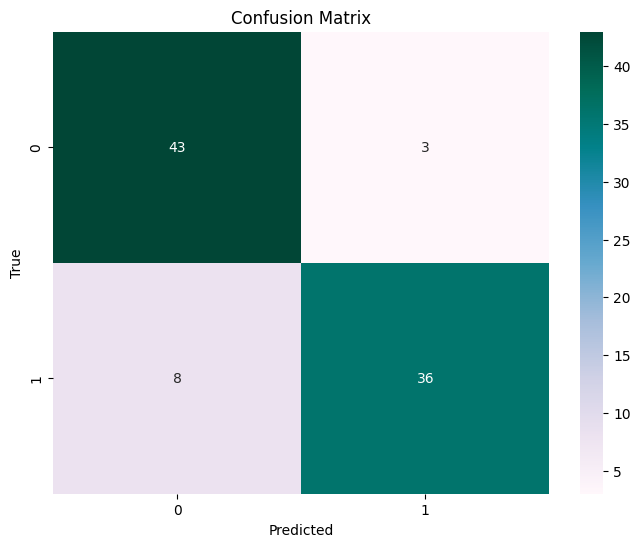

In [6]:
model = LogisticRegression(solver='liblinear')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Perceptron

Accuracy: 0.53
ROC AUC Score: 0.54
G-Mean: 0.11
F1 Score: 0.67
Sensitivity: 0.98
Specificity: 0.11
Precision: 0.51
AVG: 0.44


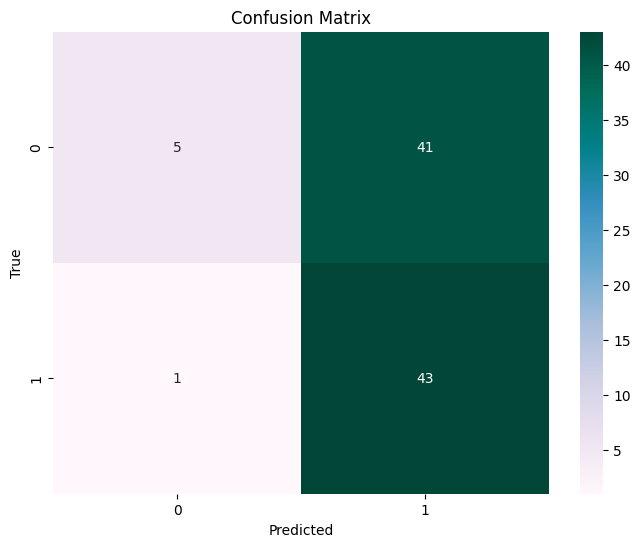

In [7]:
model = Perceptron()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Naive Bayes

Accuracy: 0.87
ROC AUC Score: 0.87
G-Mean: 0.75
F1 Score: 0.86
Sensitivity: 0.82
Specificity: 0.91
Precision: 0.9
AVG: 0.82


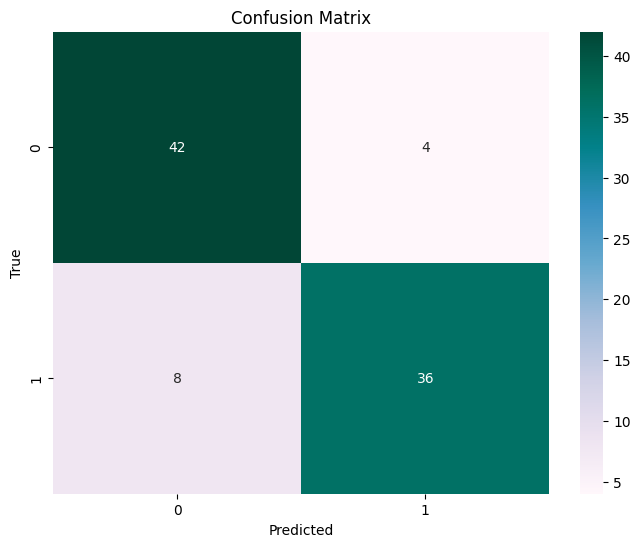

In [8]:
model = GaussianNB()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Support Vector

Accuracy: 0.61
ROC AUC Score: 0.61
G-Mean: 0.36
F1 Score: 0.57
Sensitivity: 0.52
Specificity: 0.7
Precision: 0.62
AVG: 0.51


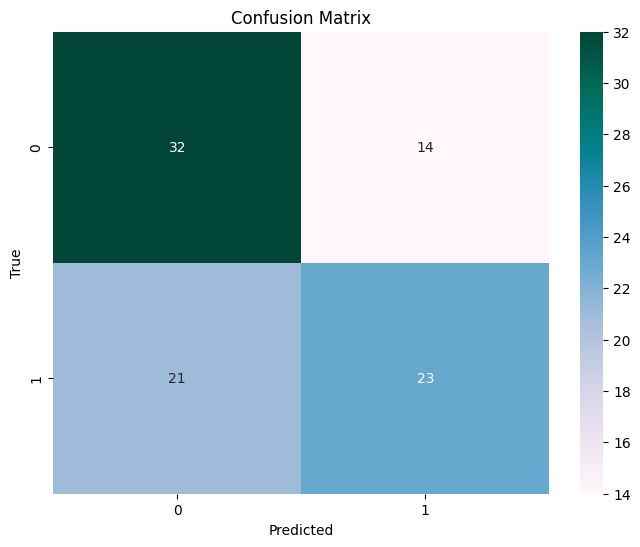

In [9]:
model = SVC()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Decision Tree

Accuracy: 0.72
ROC AUC Score: 0.72
G-Mean: 0.52
F1 Score: 0.7
Sensitivity: 0.66
Specificity: 0.78
Precision: 0.74
AVG: 0.65


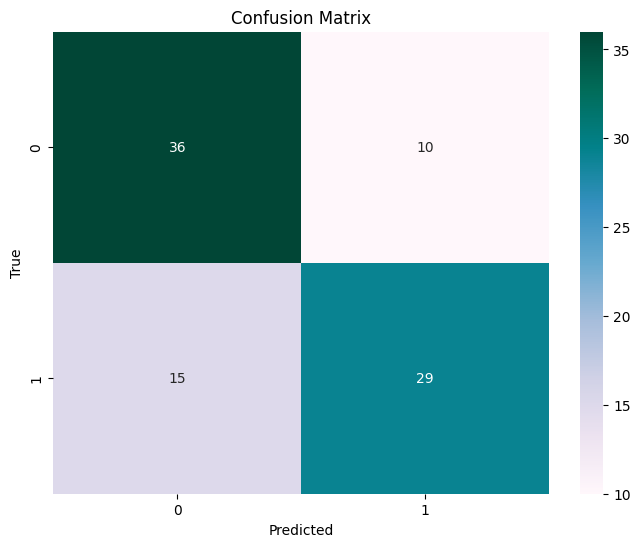

In [10]:
model = DecisionTreeClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Random Forest

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.66
F1 Score: 0.8
Sensitivity: 0.77
Specificity: 0.85
Precision: 0.83
AVG: 0.76


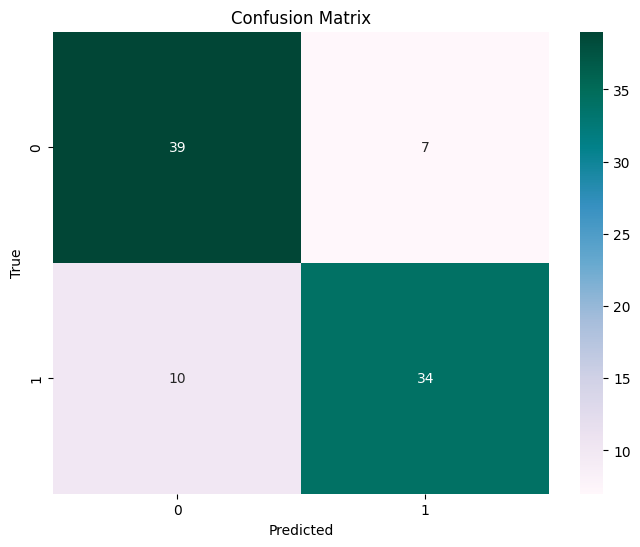

In [11]:
model = RandomForestClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Ada Boost

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.79
Sensitivity: 0.8
Specificity: 0.78
Precision: 0.78
AVG: 0.73


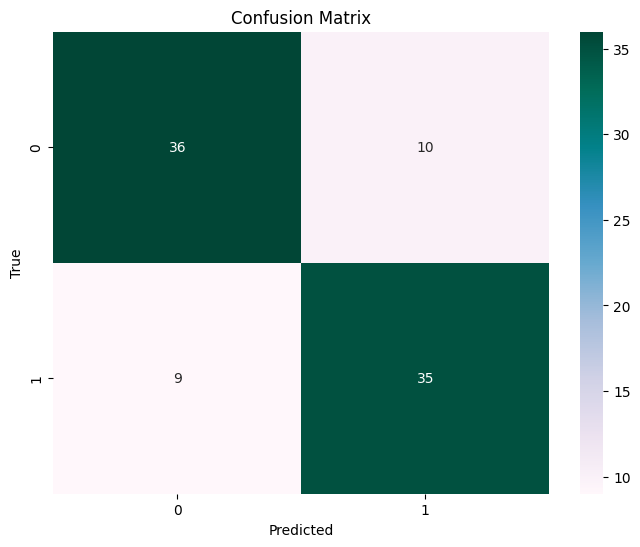

In [12]:
model = AdaBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Extreme Gradient Boosting (XGBoost)

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.78
Sensitivity: 0.75
Specificity: 0.83
Precision: 0.8
AVG: 0.73


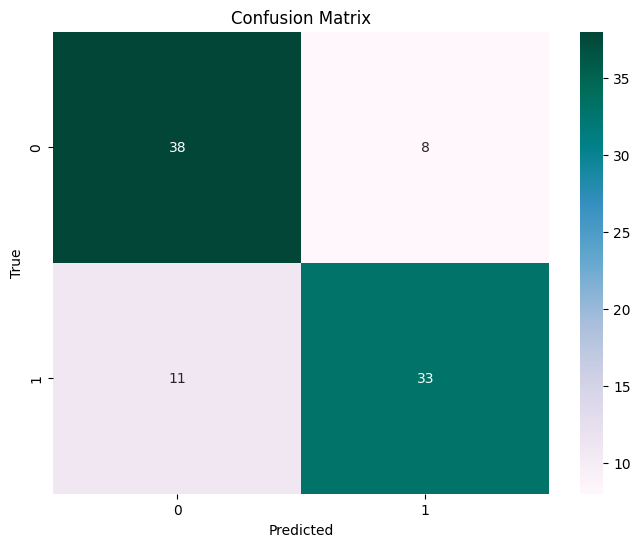

In [13]:
model = xgb.XGBClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Stochastic Gradient Boosting (SGBoost)

Accuracy: 0.82
ROC AUC Score: 0.82
G-Mean: 0.67
F1 Score: 0.81
Sensitivity: 0.8
Specificity: 0.85
Precision: 0.83
AVG: 0.77


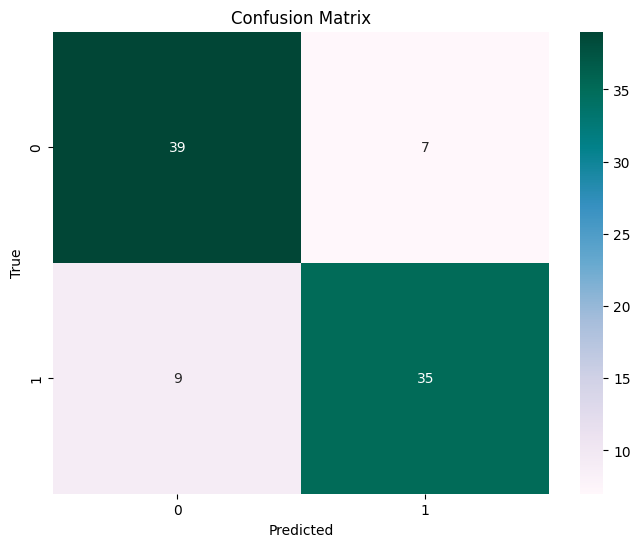

In [14]:
model = HistGradientBoostingClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Multi-layer Perceptron (Neural Network)

Accuracy: 0.84
ROC AUC Score: 0.85
G-Mean: 0.71
F1 Score: 0.85
Sensitivity: 0.89
Specificity: 0.8
Precision: 0.81
AVG: 0.8


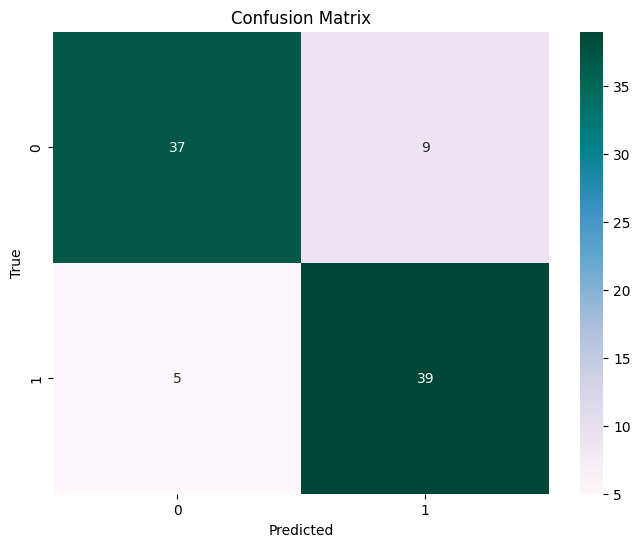

In [15]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### KNeighbors

Accuracy: 0.64
ROC AUC Score: 0.64
G-Mean: 0.42
F1 Score: 0.64
Sensitivity: 0.64
Specificity: 0.65
Precision: 0.64
AVG: 0.57


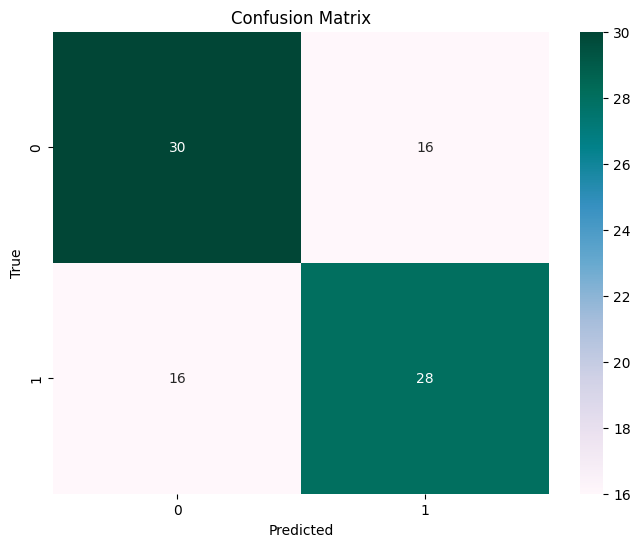

In [16]:
model = KNeighborsClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Gradient Boosting

Accuracy: 0.77
ROC AUC Score: 0.77
G-Mean: 0.58
F1 Score: 0.75
Sensitivity: 0.73
Specificity: 0.8
Precision: 0.78
AVG: 0.7


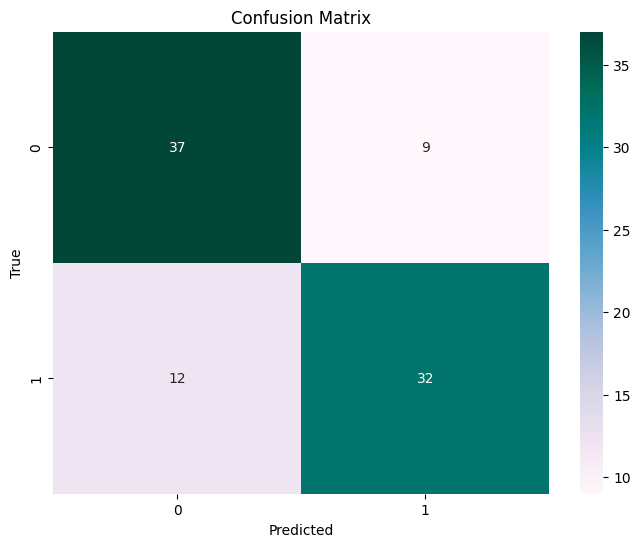

In [17]:
model = GradientBoostingClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Cat Boost

Learning rate set to 0.00548
0:	learn: 0.6883067	total: 48ms	remaining: 48s
1:	learn: 0.6832952	total: 49.1ms	remaining: 24.5s
2:	learn: 0.6783299	total: 49.9ms	remaining: 16.6s
3:	learn: 0.6737245	total: 50.8ms	remaining: 12.7s
4:	learn: 0.6694987	total: 51.7ms	remaining: 10.3s
5:	learn: 0.6650759	total: 52.7ms	remaining: 8.72s
6:	learn: 0.6609385	total: 53.6ms	remaining: 7.6s
7:	learn: 0.6563827	total: 54.5ms	remaining: 6.76s
8:	learn: 0.6532882	total: 55.4ms	remaining: 6.1s
9:	learn: 0.6488003	total: 56.3ms	remaining: 5.57s
10:	learn: 0.6443116	total: 57.2ms	remaining: 5.14s
11:	learn: 0.6403934	total: 58.1ms	remaining: 4.78s
12:	learn: 0.6371958	total: 59ms	remaining: 4.48s
13:	learn: 0.6331158	total: 59.9ms	remaining: 4.22s
14:	learn: 0.6289336	total: 60.8ms	remaining: 3.99s
15:	learn: 0.6250823	total: 61.7ms	remaining: 3.79s
16:	learn: 0.6210721	total: 62.7ms	remaining: 3.63s
17:	learn: 0.6178950	total: 63.8ms	remaining: 3.48s
18:	learn: 0.6141916	total: 64.7ms	remaining: 3.34s
1

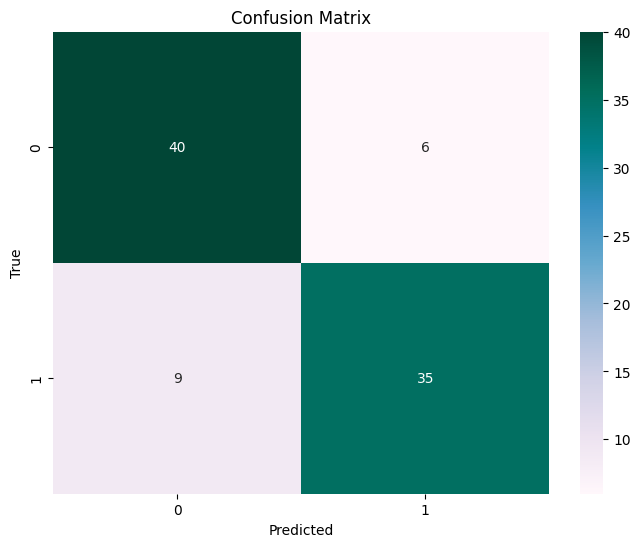

In [18]:
model = CatBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### LGBM

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

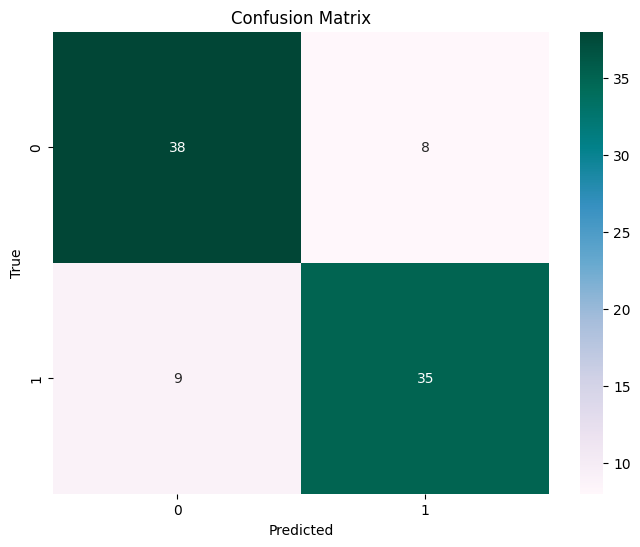

In [19]:
model = LGBMClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)